In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting pandas for proper visual of data::
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
###read the sales data
df = pd.read_csv('sales_data.csv')
df.head()

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,NaN,South,H


In [4]:
### to check the number of rows and columns
df.shape

(40000, 13)

In [5]:
## to generate list of columns
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'marriage', 'child', 'occupation', 'mortgage', 'house_owner', 'region', 'fam_income'], dtype='object')

In [6]:
## check on the numerical and categorical features in dataframe::
numerical =df.select_dtypes(include=['number']).columns
print("No. of continuos variable:" , len(numerical))
categorical =df.select_dtypes(include=['object']).columns
print("No. of categorical variable:" , len(categorical))

No. of continuos variable: 1
No. of categorical variable: 12


In [7]:
## to check the numerical value in the data
numerical

Index(['house_val'], dtype='object')

In [8]:
## to check the categorical values in the data
categorical

Index(['flag', 'gender', 'education', 'age', 'online', 'marriage', 'child', 'occupation', 'mortgage', 'house_owner', 'region', 'fam_income'], dtype='object')

In [9]:
## descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    39259 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


In [10]:
## to check for the null values in the dataset
df.isnull().sum()

flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64

In [11]:
## checking the descriptive stats
df.describe(include='all')

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
count,40000,40000,39259,4.000000e+04,40000,40000,25973,40000,40000,40000,36623,40000,40000
unique,2,3,5,NaN,7,2,2,4,6,3,2,5,13
top,Y,M,2. Some College,NaN,5_<=55,Y,Married,Y,Professional,1Low,Owner,South,E
freq,20000,22019,11400,NaN,8103,27319,20891,18012,14936,29848,29232,15676,8432
mean,NaN,NaN,NaN,3.072138e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,4.222146e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.065725e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.148720e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.937620e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
## checking the descriptive statistics of house_val column
df['house_val'].describe(include = 'all')

count    4.000000e+04
mean     3.072138e+05
std      4.222146e+05
min      0.000000e+00
25%      8.065725e+04
50%      2.148720e+05
75%      3.937620e+05
max      9.999999e+06
Name: house_val, dtype: float64

In [13]:
## replacing the 0 values in house_val column with median
df['house_val']=df['house_val'].replace(0,df['house_val'].median())

In [14]:
df.describe(include='all')

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
count,40000,40000,39259,4.000000e+04,40000,40000,25973,40000,40000,40000,36623,40000,40000
unique,2,3,5,NaN,7,2,2,4,6,3,2,5,13
top,Y,M,2. Some College,NaN,5_<=55,Y,Married,Y,Professional,1Low,Owner,South,E
freq,20000,22019,11400,NaN,8103,27319,20891,18012,14936,29848,29232,15676,8432
mean,NaN,NaN,NaN,3.485552e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,4.000468e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,5.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.855180e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.148780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.937620e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
## checking and printing the number of missing values in the dtaset
education_nan_count = df['education'].isna().sum()
marriage_nan_count = df["marriage"].isna().sum()
house_owner_nan_count = df["house_owner"].isna().sum()

print("The number of values missing from the education column is:" +str(education_nan_count) )
print("the number of values missing from the marriage column is :" +str(marriage_nan_count))
print("The number of values missing from the house_owner column is:"+str(house_owner_nan_count))

The number of values missing from the education column is:741
the number of values missing from the marriage column is :14027
The number of values missing from the house_owner column is:3377


## Handling Missing Values:

In [16]:
# Applying the mode to get the most repeated occurances in the data.
# Didn't drop the column to avoid information loss.
# If further needed to eliminate any  features, then will see at that time.

df['education'].fillna(df['education'].mode()[0],inplace=True)
df['marriage'].fillna(df['marriage'].mode()[0],inplace=True)
df['house_owner'].fillna(df['house_owner'].mode()[0],inplace=True)

In [17]:
# Chekcing further to confirm for the missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    40000 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     40000 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  40000 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


## As we can see above, all the missing values has been removed and we are good to go ahead.

In [19]:
df.head()

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,Married,U,Professional,1Low,Owner,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,Married,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,Married,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,Owner,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,Owner,South,H


In [20]:
categorical

Index(['flag', 'gender', 'education', 'age', 'online', 'marriage', 'child', 'occupation', 'mortgage', 'house_owner', 'region', 'fam_income'], dtype='object')

## Visualisations

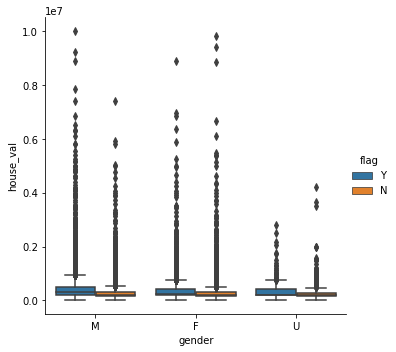

In [21]:
sns.catplot(data=df, x="gender", y="house_val", hue="flag", kind="box")

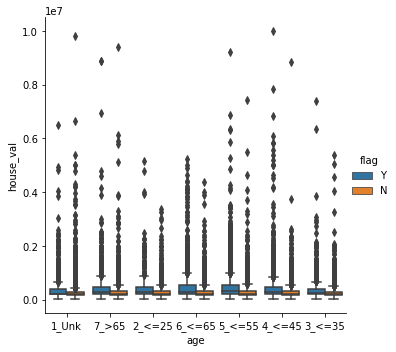

In [22]:
sns.catplot(data=df, x="age", y="house_val", hue="flag", kind="box")

<AxesSubplot:xlabel='flag', ylabel='house_val'>

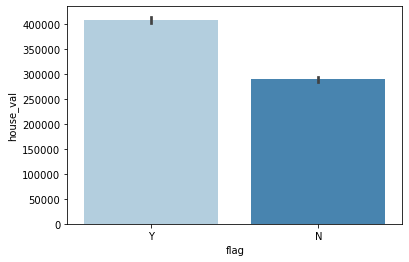

In [23]:
sns.barplot(x = 'flag',y = 'house_val',data = df,palette = "Blues")

<AxesSubplot:xlabel='age', ylabel='Count'>

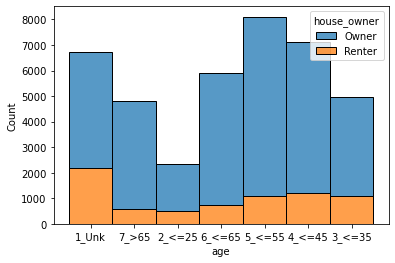

In [24]:
sns.histplot(binwidth=0.5, x="age", hue="house_owner", data=df, stat="count", multiple="stack")

<AxesSubplot:xlabel='count', ylabel='child'>

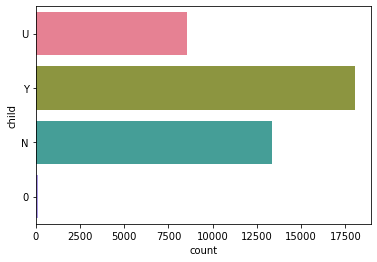

In [25]:
sns.countplot(y="child", data=df, palette="husl")

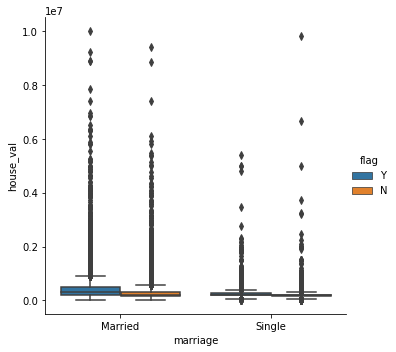

In [26]:
sns.catplot(data=df, x="marriage", y="house_val", hue="flag", kind="box")

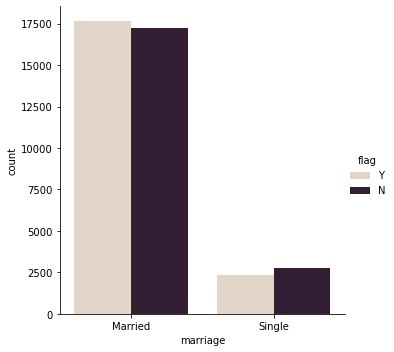

In [27]:
sns.catplot(data=df, x="marriage", kind="count",hue="flag", palette="ch:.25")

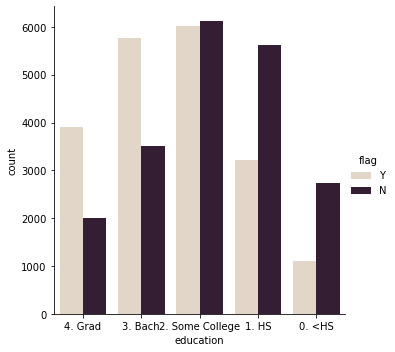

In [28]:
sns.catplot(data=df, x="education", kind="count",hue="flag", palette="ch:.25")

## Binning and managing Numerical column (House_val)

In [29]:
df['house_val'].describe(include = 'all')

count    4.000000e+04
mean     3.485552e+05
std      4.000468e+05
min      5.000000e+03
25%      1.855180e+05
50%      2.148780e+05
75%      3.937620e+05
max      9.999999e+06
Name: house_val, dtype: float64

In [30]:
## as the house_val is continous variable so we are binning the values as per their quartile

df.loc[df['house_val'].between(0, 186000, 'both'), 'house_value'] = 'house_val:1Q'
df.loc[df['house_val'].between(186000, 215000, 'right'), 'house_value'] = 'house_val:2Q'
df.loc[df['house_val'].between(215000, 394000, 'right'), 'house_value'] = 'house_val:3Q'
df.loc[df['house_val'].between(394000, 10000000, 'right'), 'house_value'] = 'house_val:4Q'

In [32]:
df.head()

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income,house_value
0,Y,M,4. Grad,756460,1_Unk,N,Married,U,Professional,1Low,Owner,Midwest,L,house_val:4Q
1,N,F,3. Bach,213171,7_>65,N,Married,U,Professional,1Low,Owner,Northeast,G,house_val:2Q
2,N,M,2. Some College,111147,2_<=25,Y,Married,Y,Professional,1Low,Owner,Midwest,J,house_val:1Q
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,Owner,West,L,house_val:3Q
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,Owner,South,H,house_val:1Q


<AxesSubplot:xlabel='occupation', ylabel='Count'>

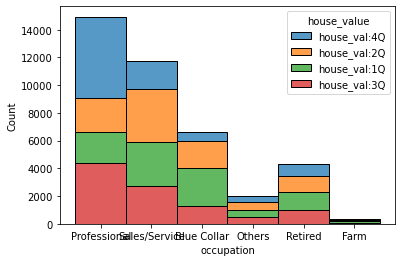

In [33]:
sns.histplot(binwidth=0.5, x="occupation", hue="house_value", data=df, stat="count", multiple="stack")

## Binary Variable handling:

In [34]:
# checking the count of each binary variable such as marriage, online, house_owner and flag::
df['marriage'].value_counts()

Married    34918
Single      5082
Name: marriage, dtype: int64

In [35]:
df['online'].value_counts()

Y    27319
N    12681
Name: online, dtype: int64

In [36]:
df['house_owner'].value_counts()

Owner     32609
Renter     7391
Name: house_owner, dtype: int64

In [37]:
df['flag'].value_counts()

Y    20000
N    20000
Name: flag, dtype: int64

In [38]:
# Dealing with Binary Variable & converting them to 1/0::

varlist = ['marriage']
df[varlist]=df[varlist].apply(lambda x: x.map({'Married': 1, 'Single': 0}))
varlist1 = ['online']
df[varlist1]=df[varlist1].apply(lambda x: x.map({'Y': 1, 'N': 0}))
varlist2 = ['house_owner']
df[varlist2]=df[varlist2].apply(lambda x: x.map({'Owner': 1, 'Renter': 0}))
varlist3 = ['flag']
df[varlist3]=df[varlist3].apply(lambda x: x.map({'Y': 1, 'N': 0}))
df.head()

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income,house_value
0,1,M,4. Grad,756460,1_Unk,0,1,U,Professional,1Low,1,Midwest,L,house_val:4Q
1,0,F,3. Bach,213171,7_>65,0,1,U,Professional,1Low,1,Northeast,G,house_val:2Q
2,0,M,2. Some College,111147,2_<=25,1,1,Y,Professional,1Low,1,Midwest,J,house_val:1Q
3,1,M,2. Some College,354151,2_<=25,1,0,U,Sales/Service,1Low,1,West,L,house_val:3Q
4,1,F,2. Some College,117087,1_Unk,1,1,Y,Sales/Service,1Low,1,South,H,house_val:1Q


In [39]:
df.isnull().sum()

flag           0
gender         0
education      0
house_val      0
age            0
online         0
marriage       0
child          0
occupation     0
mortgage       0
house_owner    0
region         0
fam_income     0
house_value    0
dtype: int64

In [40]:
categorical_new =df.select_dtypes(include=['object']).columns
print("No. of categorical variable:" , len(categorical_new))

No. of categorical variable: 9


### as we can see the number of categorical variables has been reduced from 12 to 9 because the columns of marriage,house owner, online and flag was converted into 1/0 and thus binary conversion was successfull.

In [41]:
categorical_new

Index(['gender', 'education', 'age', 'child', 'occupation', 'mortgage', 'region', 'fam_income', 'house_value'], dtype='object')

## Dealing with Dummy Varaibles :: One Hot Encoding
dummy variables: ('gender', 'education', 'age', 'child', 'occupation', 'mortgage', 'region', 'fam_income','house_value')

In [42]:
# Creating Dummy Variables::
gender=pd.get_dummies(df['gender'])
education=pd.get_dummies(df['education'])
age=pd.get_dummies(df['age'])
child=pd.get_dummies(df['child'])
occupation=pd.get_dummies(df['occupation'])
mortgage=pd.get_dummies(df['mortgage'])
region=pd.get_dummies(df['region'])
fam_income=pd.get_dummies(df['fam_income'])
house_value=pd.get_dummies(df['house_value'])

In [43]:
gender.head(2)

,F,M,U
0,0,1,0
1,1,0,0


In [44]:
fam_income.tail(2)

,A,B,C,D,E,F,G,H,I,J,K,L,U
39998,0,1,0,0,0,0,0,0,0,0,0,0,0
39999,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
house_value.head()

,house_val:1Q,house_val:2Q,house_val:3Q,house_val:4Q
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [46]:
## Dropping redundant dummy Varibales::

gender=pd.get_dummies(df['gender'], drop_first=True)
education=pd.get_dummies(df['education'], drop_first=True)
age=pd.get_dummies(df['age'], drop_first=True)
child=pd.get_dummies(df['child'], drop_first=True)
occupation=pd.get_dummies(df['occupation'], drop_first=True)
mortgage=pd.get_dummies(df['mortgage'], drop_first=True)
region=pd.get_dummies(df['region'], drop_first=True)
fam_income=pd.get_dummies(df['fam_income'], drop_first=True)
house_value=pd.get_dummies(df['house_value'],drop_first=True)

In [47]:
fam_income.shape

(40000, 12)

In [48]:
gender.head(2)

,M,U
0,1,0
1,0,0


In [49]:
df.shape

(40000, 14)

In [50]:
house_value.shape

(40000, 3)

In [51]:
## Concatenating the dummy variables to the orginal dataframe::
df=pd.concat([df,gender, education, age, child, occupation, mortgage, region, fam_income, house_value], axis = 1)
            
df.head()

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income,house_value,M,U,1. HS,2. Some College,3. Bach,4. Grad,2_<=25,3_<=35,4_<=45,5_<=55,6_<=65,7_>65,N,U,Y,Farm,Others,Professional,Retired,Sales/Service,2Med,3High,Northeast,Rest,South,West,B,C,D,E,F,G,H,I,J,K,L,U,house_val:2Q,house_val:3Q,house_val:4Q
0,1,M,4. Grad,756460,1_Unk,0,1,U,Professional,1Low,1,Midwest,L,house_val:4Q,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,F,3. Bach,213171,7_>65,0,1,U,Professional,1Low,1,Northeast,G,house_val:2Q,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,M,2. Some College,111147,2_<=25,1,1,Y,Professional,1Low,1,Midwest,J,house_val:1Q,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,M,2. Some College,354151,2_<=25,1,0,U,Sales/Service,1Low,1,West,L,house_val:3Q,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,F,2. Some College,117087,1_Unk,1,1,Y,Sales/Service,1Low,1,South,H,house_val:1Q,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [52]:
df.shape

(40000, 55)

In [53]:
## Dropping columns for which we already have dummy variables::
df=df.drop(['gender', 'education','house_val','house_value', 'age', 'child', 'occupation', 'mortgage', 'region', 'fam_income'], axis=1)
df.head(3)

,flag,online,marriage,house_owner,M,U,1. HS,2. Some College,3. Bach,4. Grad,2_<=25,3_<=35,4_<=45,5_<=55,6_<=65,7_>65,N,U,Y,Farm,Others,Professional,Retired,Sales/Service,2Med,3High,Northeast,Rest,South,West,B,C,D,E,F,G,H,I,J,K,L,U,house_val:2Q,house_val:3Q,house_val:4Q
0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
df.columns

Index(['flag', 'online', 'marriage', 'house_owner', 'M', 'U', '1. HS', '2. Some College', '3. Bach', '4. Grad', '2_<=25', '3_<=35', '4_<=45', '5_<=55', '6_<=65', '7_>65', 'N', 'U', 'Y', 'Farm', 'Others', 'Professional', 'Retired', 'Sales/Service', '2Med', '3High', 'Northeast', 'Rest', 'South', 'West', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'U', 'house_val:2Q', 'house_val:3Q', 'house_val:4Q'], dtype='object')

In [55]:
df.head(10)

,flag,online,marriage,house_owner,M,U,1. HS,2. Some College,3. Bach,4. Grad,2_<=25,3_<=35,4_<=45,5_<=55,6_<=65,7_>65,N,U,Y,Farm,Others,Professional,Retired,Sales/Service,2Med,3High,Northeast,Rest,South,West,B,C,D,E,F,G,H,I,J,K,L,U,house_val:2Q,house_val:3Q,house_val:4Q
0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [56]:
df.corr()

,flag,online,marriage,house_owner,M,U,1. HS,2. Some College,3. Bach,4. Grad,2_<=25,3_<=35,4_<=45,5_<=55,6_<=65,7_>65,N,U,Y,Farm,Others,Professional,Retired,Sales/Service,2Med,3High,Northeast,Rest,South,West,B,C,D,E,F,G,H,I,J,K,L,U,house_val:2Q,house_val:3Q,house_val:4Q
flag,1.000000,0.213994,0.029277,0.119230,0.213038,-0.079408,-0.145038,-0.005601,0.133147,0.134084,-0.087215,-0.009084,0.096952,0.121231,0.044324,-0.116399,-0.053935,0.007081,0.046329,-0.032386,0.012371,0.223586,-0.121446,-0.083448,0.102984,0.179297,0.010969,0.016982,0.002048,0.024275,-0.087984,-0.072606,-0.099693,-0.016794,0.024254,0.058895,0.062611,0.064133,0.084613,0.063825,0.088219,-0.009315,-0.129164,0.093604,0.185212
online,0.213994,1.000000,0.169052,0.213718,0.049312,-0.111232,-0.061057,-0.013789,0.140317,0.074691,-0.018885,-0.008776,0.034510,0.072566,0.060070,0.027671,0.098232,-0.095946,-0.011959,-0.015882,-0.002966,0.166508,0.002108,-0.093449,0.084243,0.132087,0.022107,-0.006424,-0.018965,-0.011573,-0.106849,-0.113142,-0.096899,0.009109,0.044524,0.074494,0.063487,0.070879,0.070900,0.049815,0.082008,-0.023931,-0.135915,0.091418,0.130617
marriage,0.029277,0.169052,1.000000,0.311012,0.006718,-0.057373,0.000289,-0.015427,0.035118,0.022125,-0.029999,-0.058139,-0.000597,0.023625,0.055752,0.123492,0.052385,-0.124547,0.052723,0.019781,0.016462,0.078159,0.107284,-0.135913,0.073723,0.104013,-0.034355,0.004933,0.035927,-0.009723,-0.067434,-0.076356,-0.082701,-0.004365,0.056838,0.043884,0.040446,0.041132,0.051905,0.044807,0.060389,0.002966,-0.191761,0.091181,0.116250
house_owner,0.119230,0.213718,0.311012,1.000000,0.057436,-0.078343,-0.033208,-0.007376,0.061270,0.062804,-0.021851,-0.034537,0.020664,0.061900,0.065810,0.063698,0.091087,-0.070653,-0.031180,0.011262,-0.009250,0.140465,0.046825,-0.135813,0.175868,0.187052,-0.034942,-0.001428,0.021710,-0.027583,-0.103883,-0.096627,-0.112325,0.010111,0.074798,0.063191,0.051529,0.065217,0.075690,0.050989,0.068936,0.022196,-0.318542,0.136705,0.146732
M,0.213038,0.049312,0.006718,0.057436,1.000000,-0.190476,-0.090111,0.004884,0.032370,0.078342,-0.003012,0.004174,0.026727,0.017819,0.001890,-0.015804,-0.000478,0.018105,-0.013350,0.035553,0.046916,0.026921,-0.025628,-0.150817,0.042065,0.080697,-0.006823,0.018122,-0.006408,0.011209,-0.038832,-0.035762,-0.033182,-0.015723,0.012330,0.012722,0.028229,0.029589,0.036658,0.033854,0.047432,-0.007509,-0.056546,0.027047,0.088374
U,-0.079408,-0.111232,-0.057373,-0.078343,-0.190476,1.000000,-0.005779,-0.001417,-0.027172,-0.003047,-0.021521,-0.018753,-0.036265,-0.052152,-0.053522,-0.037089,-0.032884,0.043672,-0.004597,-0.002429,0.008412,-0.036724,-0.029286,0.058550,-0.018958,-0.020615,0.009500,-0.007762,0.002733,0.009031,0.024821,0.033862,0.010402,-0.006831,-0.019731,-0.009998,-0.015377,-0.014915,-0.014776,-0.010109,-0.013310,-0.000975,0.042747,-0.021971,-0.017097
1. HS,-0.145038,-0.061057,0.000289,-0.033208,-0.090111,-0.005779,1.000000,-0.351312,-0.292224,-0.221711,-0.054712,-0.054387,-0.092420,0.020798,0.048311,0.101601,0.054912,-0.008997,-0.045103,0.001595,-0.000476,-0.213903,0.118985,0.039823,-0.063615,-0.120176,0.029516,0.000717,-0.004284,-0.057309,0.050657,0.048639,0.080019,0.045381,-0.012907,-0.034765,-0.047660,-0.060505,-0.068685,-0.055181,-0.077703,0.006087,0.069997,-0.058326,-0.152488
2. Some College,-0.005601,-0.013789,-0.015427,-0.007376,0.004884,-0.001417,-0.351312,1.000000,-0.362503,-0.275032,0.228153,-0.006053,0.044138,-0.030367,-0.072021,-0.111151,-0.052932,0.031270,0.023050,0.008513,0.064557,-0.088967,-0.105342,0.096228,0.027964,-0.038430,-0.052183,0.014382,-0.005464,0.049472,-0.012328,0.002048,0.000896,0.053014,0.022984,0.011661,-0.007911,-0.009185,-0.036167,-0.028551,-0.061785,0.011064,0.006107,0.031306,-0.073295
3. Bach,0.133147,0.140317,0.035118,0.061270,0.032370,-0.027172,-0.292224,-0.362503,1.000000,-0.228774,-0.090471,0.031458,0.119567,0.016326,-0.001420,-0.026231,-0.007407,-0.013994,0.019660,-0.018515,-0.043369,0.230514,-0.047760,-0.081681,0.046899,0.119043,0.004623,

In [57]:
df['flag'].value_counts()

1    20000
0    20000
Name: flag, dtype: int64

## Model Building steps:

In [58]:
# importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [59]:
## Performing test train split 
y = df.flag
X = df.drop("flag", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

### checking the dimensions of test and train data for X and Y.

In [60]:
X_train.shape

(30000, 44)

In [61]:
X_test.shape

(10000, 44)

In [62]:
y_train.shape

(30000,)

In [63]:
y_test.shape

(10000,)

## First Model : KNN 

In [64]:
C=10
classifiers = {'KNN classifier' : KNeighborsClassifier(C)
              }

In [65]:
n_classifiers = len(classifiers)

In [66]:
for index, (name, classifier) in enumerate(classifiers.items()):
   classifier.fit(X_train, np.ravel(y_train))

In [67]:
classifier.score(X_train, y_train)

0.7218666666666667

In [68]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (test) for %s: %0.1f%% " % (name, accuracy * 100))
print(classification_report(y_test,y_pred))

Accuracy (test) for KNN classifier: 64.7% 
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      5000
           1       0.67      0.58      0.62      5000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



Confusion Matrix : 
 [[3558 1442]
 [2087 2913]]


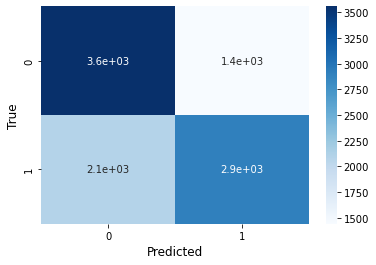

In [69]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

total=sum(sum(cm))

In [70]:
#calculating accuracy from confusion matrix
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Accuracy :  0.6471


In [71]:
#calculating sensitivity from confusion matrix
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.7116


In [72]:
#calculating specificity from confusion matrix
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.5826


In [73]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.71


## Applying PCA

In [74]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [75]:
pca.fit(X_train)
df_pca = pca.fit_transform(X_train)

In [76]:
# Extracting pca model from pipeline 
pca = pca.named_steps['pca']

# checking explained variance of the PCA components 
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       7.13
1      12.83
2      17.09
3      20.88
4      24.43
5      27.71
6      30.86
7      33.93
8      36.84
9      39.67
10     42.49
11     45.27
12     47.94
13     50.55
14     53.13
15     55.62
16     58.10
17     60.57
18     62.99
19     65.39
20     67.75
21     70.11
22     72.45
23     74.75
24     77.03
25     79.22
26     81.36
27     83.49
28     85.50
29     87.43
30     89.30
31     91.06
32     92.75
33     94.26
34     95.71
35     96.98
36     97.72
37     98.38
38     98.88
39     99.28
40     99.61
41     99.86
42    100.00
43    100.00
dtype: float64


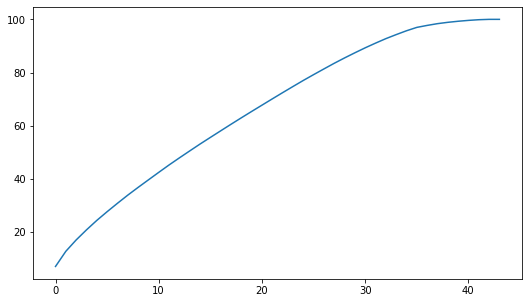

In [77]:
# Importing matplotlib
import matplotlib.pyplot as plt


features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) 
plt.plot(cumulative_variance)

Now we see from PCA analysis that approx 30 features explain the 90% of the variance and it takes around 35 features to explain 95%+ of the variance

## Logisctic Regression with PCA

In [78]:
vars_pca = 30
pipeline_steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=vars_pca)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(pipeline_steps)

In [79]:
# fitting of model / Training the model:
pipeline.fit(X_train, y_train)

# check score on train data :
pipeline.score(X_train, y_train)

0.6783333333333333

In [80]:
pipeline.score(X_test,y_test)

0.674

# Evaluation on test data:

In [81]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

y_pred = pipeline.predict(X_test)


cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))

Confusion Matrix : 
 [[3327 1673]
 [1587 3413]]


Text(33.0, 0.5, 'True')

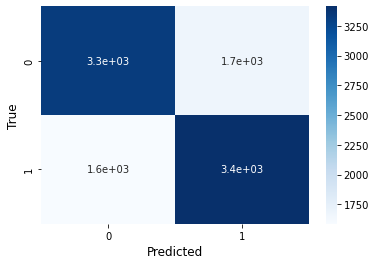

In [82]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [83]:
#calculating accuracy from confusion matrix
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Accuracy :  0.674


In [84]:
#calculating sensitivity from confusion matrix
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.6654


In [85]:
#calculating specificity from confusion matrix
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.6826


In [86]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.73


## Random Forest with Hyper parameter tuning as Stratified Kfold sampling:

In [87]:
rf = RandomForestClassifier(class_weight={0:0.5, 1: 0.5}, n_jobs = -1)
parameters = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.1]}
k_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model_rf = GridSearchCV(estimator=rf, cv=k_folds, param_grid=parameters, scoring='roc_auc', n_jobs=-1, verbose=1)
model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.5, 1: 0.5},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.1]},
             scoring='roc_auc', verbose=1)

In [90]:
# Training Accuracy check:
model_rf.best_score_

0.7072796777777778

In [92]:
# BEST HYPERPARAM
model_rf.best_params_

{'criterion': 'entropy', 'max_features': 0.1}

In [93]:
y_pred_model_rf = model_rf.predict(X_test)


cm_model_rf = confusion_matrix(y_test,y_pred_model_rf)
print('Confusion Matrix : \n', cm_model_rf)

total_cm_model_rf=sum(sum(cm_model_rf))

Confusion Matrix : 
 [[3255 1745]
 [1774 3226]]


Text(33.0, 0.5, 'True')

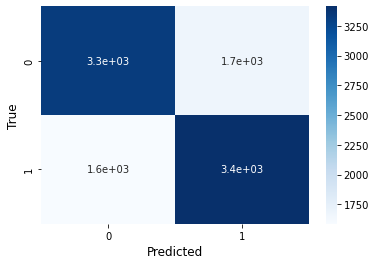

In [94]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [95]:
#calculating accuracy from confusion matrix
accuracy_cm_model_rf=(cm_model_rf[0,0]+cm_model_rf[1,1])/total_cm_model_rf
print ('Accuracy : ', accuracy_cm_model_rf)

Accuracy :  0.6481


In [96]:
#calculating sensitivity from confusion matrix
sensitivity_cm_model_rf = cm_model_rf[0,0]/(cm_model_rf[0,0]+cm_model_rf[0,1])
print('Sensitivity : ', sensitivity_cm_model_rf )

Sensitivity :  0.651


In [97]:
#calculating specificity from confusion matrix
specificity_cm_model_rf = cm_model_rf[1,1]/(cm_model_rf[1,0]+cm_model_rf[1,1])
print('Specificity : ', specificity_cm_model_rf)

Specificity :  0.6452


# Conclusion:
Logistics regression gave the best result when applied with PCA with an accuracy of 67.4% followed by Random Forest with an accuracy of 65% whereas the highest true positive rate was observed in KNN as 71%